
# Projet 2

In [6]:
# import des modules usuels
import numpy as np
import pandas as pd
import json
import shapely
import matplotlib.pyplot as plt

# options d'affichage
pd.set_option("display.min_rows", 16)

In [7]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [8]:
geo['CP Ville']=geo['Code Postal']+' '+geo['Commune']

In [9]:
# fonction recherche de ville

def ville(lat, long):
    nearest=geo.apply(lambda row: np.sqrt((lat-row['Latitude'])**2+(long-row['Longitude'])**2),axis=1).idxmin()
    town=geo['Commune'].loc[nearest]
    return town

In [10]:
ville(48.714,2.22)

'PALAISEAU'

In [11]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [12]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [13]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [14]:
#Utiliser la librairie Python json pour parser la colonne "geo_shape".
data=pd.DataFrame(data={'type':geo['geo_shape'].apply(lambda x:json.loads(x)['type']),'coordinates':geo['geo_shape'].apply(lambda x:json.loads(x)['coordinates'])},index=geo['geo_shape'].index)

In [15]:
data.head()

,type,coordinates
Code INSEE,,
01001,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921..."
01002,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4..."
01004,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374..."
01005,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8..."
01006,Polygon,"[[[5.614854625053272, 45.734638855121595], [5...."


In [16]:
#Donner le décompte des valeurs accédées avec la clé "type".
data['type'].value_counts()

Polygon         36670
MultiPolygon       72
Name: type, dtype: int64

In [17]:
#Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
data['coordinates'].str.len().value_counts()

1    36660
2       80
4        1
3        1
Name: coordinates, dtype: int64

In [18]:
#Quelle commune est la plus complexe géométriquement ?
geo.loc[data['coordinates'].str.len().idxmax()]['Commune']

'HYERES'

In [19]:
#Quelle commune est la seconde la plus complexe géométriquement ?
geo.loc[data['coordinates'].str.len().sort_values(ascending=False).index[1]]['Commune']

'VAL-DE-REUIL'

In [20]:
#Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
geo.loc[(data['coordinates'].str.len().sort_values(ascending=False)==2) & (data['type']=='Polygon')]['Commune']

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

In [21]:
#Pour ces villes vérifier que le premier polygone contient bien le second (enclave)
polygon_2=data.loc[(data['coordinates'].str.len().sort_values(ascending=False)==2) & (data['type']=='Polygon')]['coordinates']

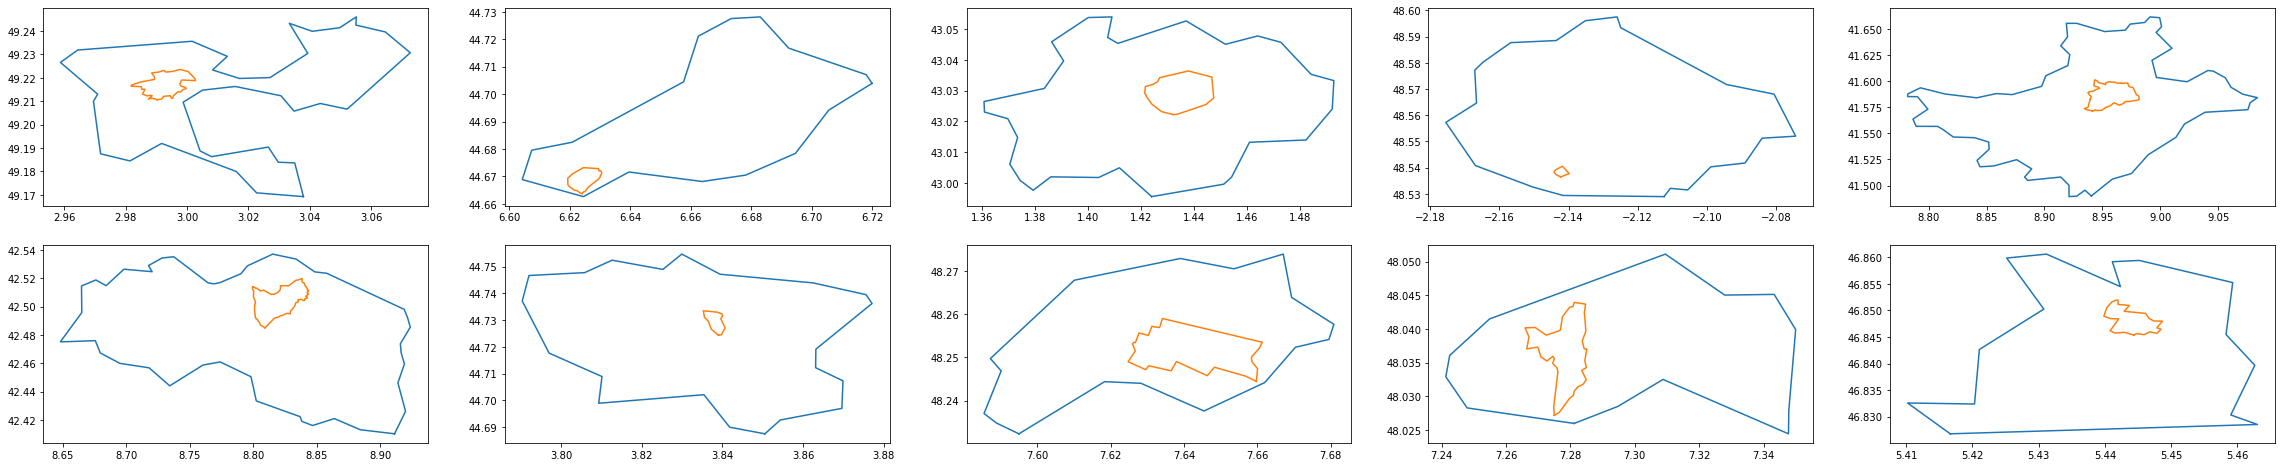

In [22]:
from shapely.geometry import Polygon

figure = plt.figure(figsize=(40,8))
for i,polygons in enumerate(polygon_2):
    figure.add_subplot(2,len(polygon_2)/2,i+1)
    for polygon in polygons:
        plt.plot(*Polygon(polygon).exterior.xy)

plt.show()